In [1]:
import pandas as pd #For data handling
import matplotlib.pyplot as plt #For charts
import seaborn as sns #For better visuals
sns.set_style("whitegrid") #Nice plot styles

In [15]:
df = pd.read_csv('/home/lokesh/Downloads/globalterrorismdb_0718dist.csv', encoding='latin1', low_memory=False)
print(df.shape) #Shows rows x columns, e.g., (181691, 135)
df.head() #First 5 rows preview

(181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
#Selecting only 9 important columns(reduces from 135 to 9)
df = df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 
        'attacktype1_txt', 'nkill', 'nwound', 'weaptype1_txt']].copy()

In [17]:
#Many attacks have NaN(empty columns) for deaths so we will replace NaN(string) with 0(integer)
df['nkill']=df['nkill'].fillna(0).astype(int)
df['nwound']=df['nwound'].fillna(0).astype(int)

In [18]:
#Removing invalid years
df=df[df['iyear']>=1970]

In [19]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,nkill,nwound,weaptype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,1,0,Unknown
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),0,0,Unknown
2,1970,1,0,Philippines,Southeast Asia,Assassination,1,0,Unknown
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,0,0,Explosives
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,0,0,Incendiary


In [22]:
print("Clean data overview")
print("Total attacks:", len(df))
print("Years covered:", df['iyear'].min(), "to", df['iyear'].max())
print("\n Top 5 countries:")
print(df['country_txt'].value_counts().head())
print("\n Most common attack types:")
print(df['attacktype1_txt'].value_counts().head())

Clean data overview
Total attacks: 181691
Years covered: 1970 to 2017

 Top 5 countries:
country_txt
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: count, dtype: int64

 Most common attack types:
attacktype1_txt
Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: count, dtype: int64


In [25]:
import matplotlib.pyplot as plt

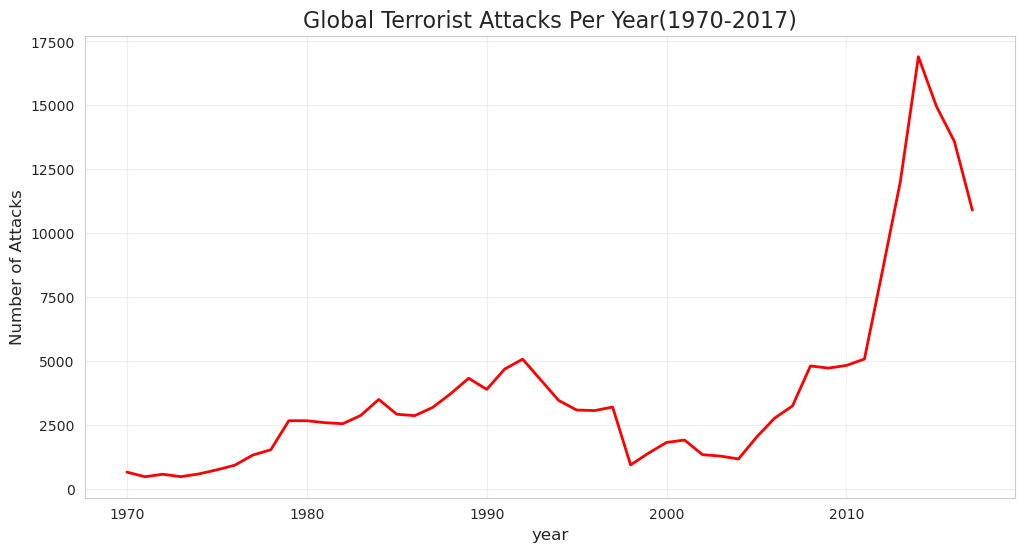

In [29]:
#count attacks per year
yearly_attacks = df['iyear'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_attacks.plot(kind='line', linewidth=2, color='red')
plt.title('Global Terrorist Attacks Per Year(1970-2017)', fontsize=16)
plt.xlabel('year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()



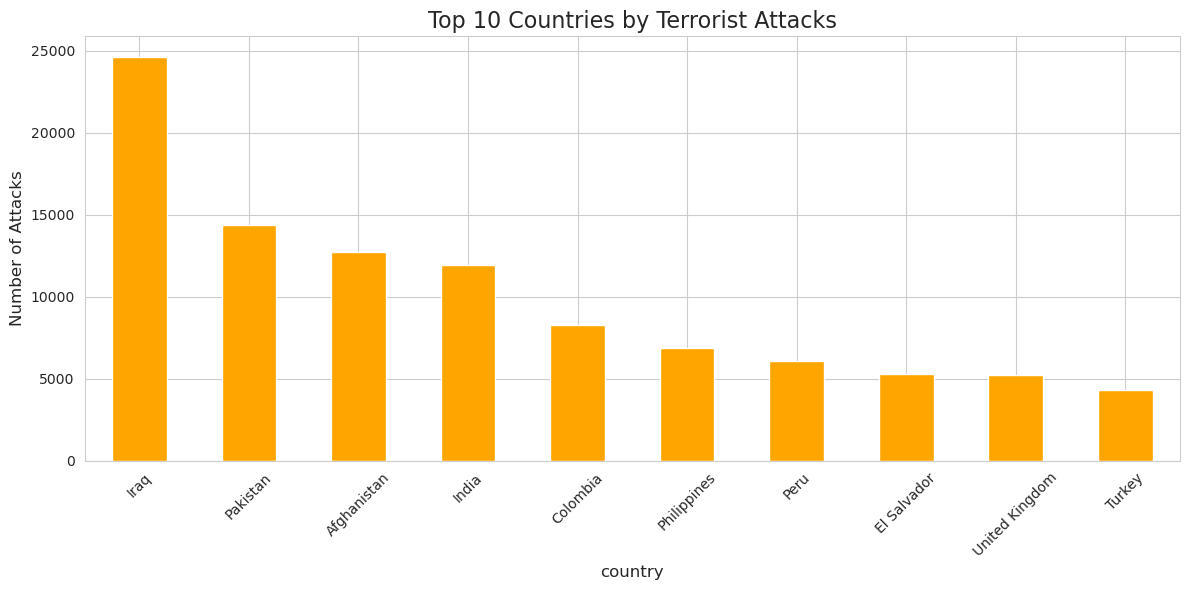

In [34]:
top_countries = df['country_txt'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Terrorist Attacks', fontsize=16)
plt.xlabel('country', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

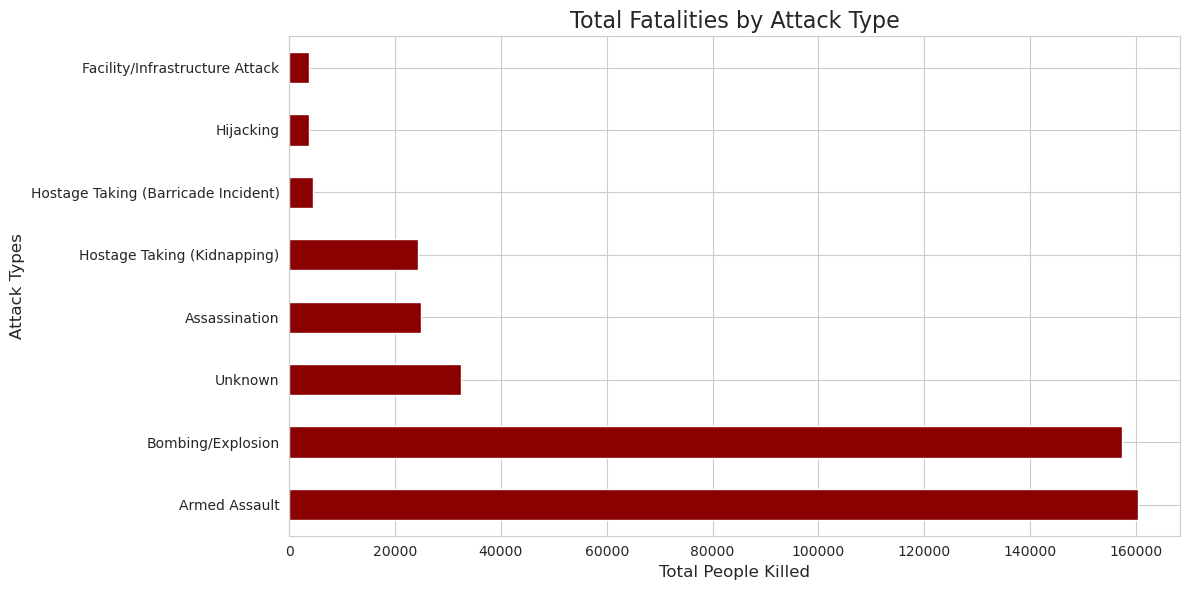

In [41]:
deadly_types = df.groupby('attacktype1_txt')['nkill'].sum().sort_values(ascending=False).head(8)

plt.figure(figsize=(12,6))
deadly_types.plot(kind='barh', color='darkred')
plt.title('Total Fatalities by Attack Type', fontsize=16)
plt.xlabel('Total People Killed', fontsize=12)
plt.ylabel('Attack Types', fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
plt.savefig('chart1_yearly_Trends.png', dpi=300, bbox_inches='tight')
plt.savefig('chart2_Top_countries.png', dpi=300, bbox_inches='tight')
plt.savefig('chart3_Attack_Types.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>